In [1]:
'''import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils
import os


car_img = cv.imread(filename)
car_img = cv.cvtColor(car_img, cv.COLOR_BGR2RGB)
plt.imshow(car_img)

#/content/MLProject/archive/images/Cars0.png

repo_dir = ""

# set the path to the folder containing the images
images_dir = os.path.join(repo_dir, "archive\images")
os.listdir(images_dir)
print("\n",images_dir)
'''
'''image_file = images_dir + "\Cars90.png"

img = cv.imread(image_file)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow("Image", img)

# read all the image files in the folder using OpenCV'''
'''for filename in os.listdir(images_dir):
    filepath = os.path.join(images_dir, filename)
    image = cv.imread(filepath)

    # do some processing on the image here...
    plt.imshow("Image", image)
    cv.waitKey(0)'''


'for filename in os.listdir(images_dir):\n    filepath = os.path.join(images_dir, filename)\n    image = cv.imread(filepath)\n\n    # do some processing on the image here...\n    plt.imshow("Image", image)\n    cv.waitKey(0)'

In [2]:
gray_mono = cv.cvtColor(car_img,cv.COLOR_RGB2GRAY)
plt.imshow(gray_mono, cmap='gray', vmin=0, vmax=255)

NameError: name 'cv' is not defined

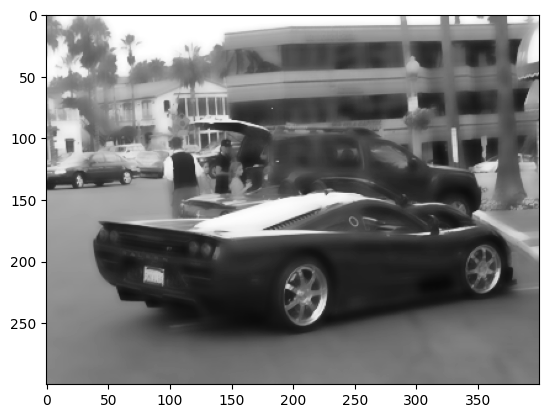

In [ ]:
blurred_gray = cv.bilateralFilter(gray_mono, 10, 50, 50)
plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

(300, 400)


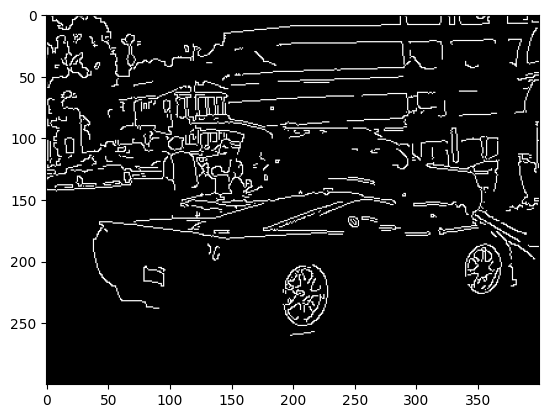

In [ ]:


edged = cv.Canny(blurred_gray, 140, 200) 
print(edged.shape)
plt.imshow(edged, cmap='gray', vmin=0, vmax=255)



741.2030981779099
[[[104  64]]

 [[117  59]]

 [[117  89]]

 [[183 100]]

 [[120  62]]

 [[147  60]]

 [[121  54]]

 [[146  66]]

 [[115  82]]

 [[174  92]]

 [[117  89]]]
58.72792184352875
[[[ 80 204]]

 [[ 79 216]]

 [[ 90 217]]

 [[ 95 220]]

 [[ 95 210]]

 [[ 89 207]]

 [[ 83 207]]]
54.97056245803833
[[[ 79 206]]

 [[ 81 205]]

 [[ 83 207]]

 [[ 89 207]]

 [[ 95 211]]

 [[ 95 219]]

 [[ 94 220]]

 [[ 93 218]]

 [[ 80 216]]]
394.977702498436
[[[308 122]]

 [[345 128]]

 [[353 141]]

 [[346 166]]

 [[350 158]]

 [[367 167]]

 [[350 158]]

 [[347 130]]

 [[361 125]]

 [[346 124]]

 [[366 120]]

 [[363 143]]

 [[367 118]]

 [[328 124]]

 [[324 110]]

 [[325 123]]]
836.7249563932419
[[[121  90]]

 [[160  99]]

 [[122 116]]

 [[144 149]]

 [[109 155]]

 [[165 154]]

 [[137 152]]

 [[175 140]]

 [[157 119]]

 [[142 146]]

 [[122 119]]

 [[160  97]]]
161.2964630126953
[[[71 17]]

 [[61 20]]

 [[67 26]]

 [[66 50]]

 [[56 47]]

 [[55 29]]

 [[52 32]]

 [[57 35]]

 [[58 50]]

 [[67 50]]

 [[

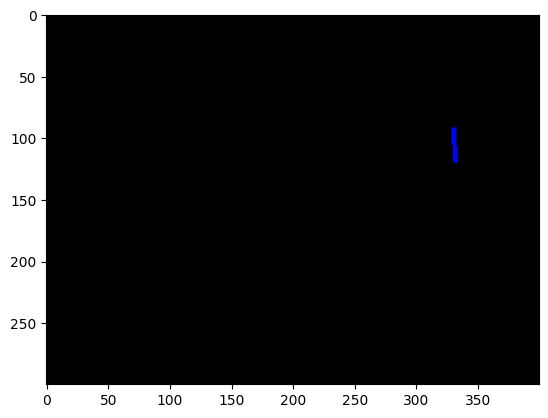

In [ ]:
contours = cv.findContours(edged.copy(), cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

contours = sorted(contours,key=cv.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv.arcLength(c, True)
    print(peri)
    approx = cv.approxPolyDP(c, 0.018 * peri, True)
    print(approx)
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No License Plate Detected")
else:
     detected = 1

if detected == 1:
    cv.drawContours(car_img, [screenCnt], -1, (0, 0, 255), 3)
    
    mask = np.zeros(gray_mono.shape,np.uint8)
    new_image = cv.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv.bitwise_and(car_img,car_img,mask=mask)
    plt.imshow(new_image)

Current Code


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils
import os

filedict = "archive\images"
for filename in os.listdir(filedict):
    filepath = filedict + "\\" +  filename
    image = cv.imread(filepath)
    # do some processing on the image here...
    car_img = cv.imread(filepath)

    car_img = cv.cvtColor(car_img, cv.COLOR_BGR2RGB)
    
    plt.imshow(image)

    gray_mono = cv.cvtColor(car_img,cv.COLOR_RGB2GRAY)

    plt.imshow(gray_mono, cmap='gray', vmin=0, vmax=255)

    blurred_gray = cv.bilateralFilter(gray_mono, 10, 50, 50)

    plt.imshow(blurred_gray, cmap='gray', vmin=0, vmax=255)

    edged = cv.Canny(blurred_gray, 140, 200) 

    plt.imshow(edged, cmap='gray', vmin=0, vmax=255)

    contours = cv.findContours(edged.copy(), cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

    contours = imutils.grab_contours(contours)

    contours = sorted(contours,key=cv.contourArea, reverse = True)[:10]
    screenCnt = None

    for c in contours:
    
        peri = cv.arcLength(c, True)
        print(peri)
        approx = cv.approxPolyDP(c, 0.018 * peri, True)
        print(approx)
        if len(approx) == 4:
            screenCnt = approx
            break

    if screenCnt is None:
        detected = 0
        print ("No License Plate Detected")
    else:
        detected = 1

    if detected == 1:
        cv.drawContours(car_img, [screenCnt], -1, (0, 0, 255), 3)
    
        mask = np.zeros(gray_mono.shape,np.uint8)
        new_image = cv.drawContours(mask,[screenCnt],0,255,-1,)
        new_image = cv.bitwise_and(car_img,car_img,mask=mask)
        cv.imshow("image",new_image)
        cv.waitKey(0)


YOLO Based Code https://wellsr.com/python/object-detection-from-images-with-yolo/
https://docs.opencv.org/3.4/de/d09/tutorial_table_of_contents_contours.html
https://docs.opencv.org/3.4/dc/da3/tutorial_copyMakeBorder.html
https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html
https://docs.opencv.org/3.4/da/d7f/tutorial_back_projection.html
https://docs.opencv.org/3.4/d9/d80/classcv_1_1cuda_1_1CascadeClassifier.html
https://docs.opencv.org/3.4/da/d56/group__text__detect.html
https://docs.opencv.org/3.4/d8/df2/group__text__recognize.html


In [ ]:
!pip install imageAI
!pip install opencv-python
!pip install Pillow




                                              0.0/69.8 kB ? eta -:--:--
     ---------------------------------------- 69.8/69.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="license plate")
trainer.setTrainConfig(object_names_array=["license plate"], batch_size=4, num_experiments=200, train_from_pretrained_model="yolov3.pt")
trainer.trainModel()

In [ ]:
from imageai.Detection import ObjectDetection

obj_detect = ObjectDetection()

obj_detect.setModelTypeAsYOLOv3()

obj_detect.setModelPath(r"C:/Datasets/yolo.h5")
obj_detect.loadModel()

detected_obj = obj_detect.detectObjectsFromImage(
    input_image=r"C:/Datasets/test_image.jpg",
    output_image_path=r"C:/Datasets/test_image_output.jpg"
)

for obj in detected_obj:
    print(obj["name"] + "-"
          +str(obj["percentage_probability"]),
          obj["box_points"])
    
from PIL import Image

im = Image.open(r"C:/Datasets/test_image_output.jpg")
im.show()

RuntimeError: Dependency error!!! PyTorch and TorchVision are not installed. Please see installation instructions in the documentation https://imageai.readthedocs.io/

New Test


In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
Updating files:  91% (1890/2058)
Updating files:  92% (1894/2058)
Updating files:  93% (1914/2058)
Updating files:  94% (1935/2058)
Updating files:  95% (1956/2058)
Updating files:  96% (1976/2058)
Updating files:  97% (1997/2058)
Updating files:  98% (2017/2058)
Updating files:  99% (2038/2058)
Updating files: 100% (2058/2058)
Updating files: 100% (2058/2058), done.


In [5]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

[WinError 2] The system cannot find the file specified: 'darknet'
c:\Users\gvina\OneDrive\Documents\GitHub\MLProject\darknet


'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

The system cannot find the path specified.


In [4]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

'make' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False